# Synthetic data

In [1]:
!pwd
import os
os.chdir('..') # for server this isnt reqd
from bilevel.synth_datagen import SynthGenLinear

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/home/jupyter-kriach/md_github_lat/multigroupcode/multigroup-code/iclr_res


In [2]:
import pickle
def save_ob(name, obj):
    with open(name, 'wb') as handle:
        pickle.dump(obj, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
def load_ob(name):
    with open(name, 'rb') as handle:
        obj = pickle.load(handle)
    return obj

In [3]:
def performance_diff(ds_obj):
    df_res = pd.concat([ds_obj.df_base_meansd, ds_obj.df_Anh_meansd], axis=1)
    df_res['base_minus_Anh'] = df_res['mean_base'] - df_res['mean_Anh']
    df_res['discount_from_base'] = (df_res['base_minus_Anh'] / df_res['mean_base'])*100
    return df_res

In [4]:
# # call only one time, used the saved syn_ob below
# params = {'samples': 100000, 'dim':20, 
#         'group_dict': {'SEX':['male', 'female'], 'RACE': ['white', 'black', 'two-or-more','some-other', 'asian', 'native-am']},
#         'prob_dict': {'SEX': [0.5, 0.5], 'RACE': [0.61, 0.12, 0.1, 0.08, 0.06, 0.03]},
#         'feat_lo': 0.0, 'feat_hi': 1.0, 'w_lo': 0.0, 'w_hi': 1.0,
#         'add_linear_mapping': True, 'add_quad_mapping' : False, 
#         'S_lo': 0.0, 'S_hi':0.0,
#         'label_noise_width':0.16, 'drop_sensitive':False, 'fixed_seed':42,
#         }
# syn_ob = SynthGenLinear(**params)
# print(syn_ob.dperm, np.array(syn_ob.all_groupnames)[syn_ob.dperm])
# df = syn_ob.df
params = {'samples': 100000, 'dim':20, 
        'group_dict': {'SHAPE':['circle', 'square', 'triangle'], 'COLOR': ['green', 'red']},
        'prob_dict': {'SHAPE': [0.5, 0.3, 0.2], 'COLOR': [0.6, 0.4]},
        'feat_lo': 0.0, 'feat_hi': 1.0, 'w_lo': 0.0, 'w_hi': 1.0,
        'add_linear_mapping': True, 'add_quad_mapping' : False,
        'S_lo': 0.0, 'S_hi':0.0,
        'label_noise_width':0.16, 'drop_sensitive':False, 'fixed_seed':21,
        }
syn_ob = SynthGenLinear(**params)
print(syn_ob.dperm, np.array(syn_ob.all_groupnames)[syn_ob.dperm])
df = syn_ob.df

[3 1 4 2 0] ['green' 'square' 'red' 'triangle' 'circle']


In [5]:
# save_ob('syn_neutral_2sg_exploss_.pickle', syn_ob)

In [5]:
print(df.columns)
filter_feature = [col for col in df if col.startswith('x')]
filter_label = [col for col in df if col.startswith('y')]
filter_group = [col for col in df if col.startswith('g')]
print(filter_feature, filter_label, filter_group)

Index(['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9',
       'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18',
       'x_19', 'g_circle', 'g_square', 'g_triangle', 'g_green', 'g_red',
       'y_circle', 'y_square', 'y_triangle', 'y_green', 'y_red',
       'y_mean_active', 'y_min_active', 'y_max_active', 'y_dperm_active'],
      dtype='object')
['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19'] ['y_circle', 'y_square', 'y_triangle', 'y_green', 'y_red', 'y_mean_active', 'y_min_active', 'y_max_active', 'y_dperm_active'] ['g_circle', 'g_square', 'g_triangle', 'g_green', 'g_red']


In [32]:
A_t

,circle,square,triangle,green,red,always_on
0,1.0,0.0,0.0,1.0,0.0,1
1,0.0,1.0,0.0,0.0,1.0,1
2,0.0,1.0,0.0,1.0,0.0,1
3,1.0,0.0,0.0,0.0,1.0,1
4,1.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...
99995,1.0,0.0,0.0,1.0,0.0,1
99996,0.0,0.0,1.0,0.0,1.0,1
99997,0.0,0.0,1.0,1.0,0.0,1
99998,1.0,0.0,0.0,1.0,0.0,1


## Note about features and labels
- x_0...x_19 are the features, y_mean, min, max, dperm are the labels
- also include group membership in features!, group memberships are
    Race groups, Sex groups

In [6]:
syn_ob.A_t.shape

(100000, 5)

In [7]:
syn_ob.A_t.sum(axis=0), syn_ob.all_groupnames

(array([49857., 30044., 20099., 59985., 40015.]),
 ['circle', 'square', 'triangle', 'green', 'red'])

In [8]:
A_t = pd.DataFrame(syn_ob.A_t, columns = syn_ob.all_groupnames) # A_t dataframe
A_t['always_on'] = 1

In [9]:
A_t.sum(axis=0)

circle        49857.0
square        30044.0
triangle      20099.0
green         59985.0
red           40015.0
always_on    100000.0
dtype: float64

In [10]:
df_mean = df[filter_feature+filter_group + ['y_mean_active']]
df_min = df[filter_feature+filter_group + ['y_min_active']]
df_max = df[filter_feature+filter_group + ['y_max_active']]
df_dperm = df[filter_feature+filter_group + ['y_dperm_active']]

In [11]:
# from bilevel.Groupwise_seedruns import BuildGroupwise_diffseeds
from bilevel.Groupwise_sortedseedruns import BuildGroupwise_noniid

## y_mean

In [12]:
%%time
ds_ymean = BuildGroupwise_noniid(df_mean, 'y_mean_active', 'g_green' , A_t) # different seeds object
ds_ymean.build_all_seeds()
ds_ymean.build_df_res()
ds_ymean.build_regret_curve()

100%|██████████| 100000/100000 [00:09<00:00, 10592.03it/s]


CPU times: user 4min 13s, sys: 4.92 s, total: 4min 18s
Wall time: 2min 12s


In [13]:
save_ob('syn_ymean_2sg_asccolor', ds_ymean)

## y_min

In [18]:
%%time
ds_ymin = BuildGroupwise_noniid(df_min, 'y_min_active', 'g_green' , A_t) # different seeds object
ds_ymin.build_all_seeds()
ds_ymin.build_df_res()
ds_ymin.build_regret_curve()

100%|██████████| 100000/100000 [00:09<00:00, 10375.91it/s]


CPU times: user 4min 28s, sys: 5.31 s, total: 4min 33s
Wall time: 2min 16s


In [19]:
save_ob('syn_ymin_2sg_asccolor.pickle', ds_ymin)

In [19]:
# pd.concat([ds_ymin.df_base_meansd, ds_ymin.df_Anh_meansd], axis=1)

## y_max

In [20]:
ds_ymax = BuildGroupwise_noniid(df_max, 'y_max_active', 'g_green' , A_t) # different seeds object
ds_ymax.build_all_seeds()
ds_ymax.build_df_res()
ds_ymax.build_regret_curve()

100%|██████████| 100000/100000 [00:09<00:00, 10374.90it/s]


In [33]:
save_ob('syn_ymax_2sg_asccolor.pickle', ds_ymax)

## y_dperm

In [21]:
ds_ydperm = BuildGroupwise_noniid(df_dperm, 'y_dperm_active', 'g_green' , A_t) # different seeds object
ds_ydperm.build_all_seeds()
ds_ydperm.build_df_res()
ds_ydperm.build_regret_curve()

100%|██████████| 100000/100000 [00:09<00:00, 10395.36it/s]


In [22]:
save_ob('syn_ydperm_2sg_asccolor.pickle', ds_ydperm)

In [23]:
# ds_ydperm.regret_Base_groupwise_array[-1].mean(axis=0), ds_ydperm.regret_Anh_groupwise_array[-1].mean(axis=0)

## checks which aggregation is the best for Anh

In [23]:
performance_diff(ds_ymean)

,mean_base,std_base,mean_Anh,std_Anh,base_minus_Anh,discount_from_base
circle,34.866443,0.191313,21.503598,0.236404,13.362845,38.325805
square,27.767212,0.110866,14.973358,0.138120,12.793854,46.075401
triangle,27.253698,0.133207,10.613838,0.079712,16.639860,61.055421
green,62.909771,0.007671,36.179780,0.272143,26.729992,42.489412
red,26.977581,0.068753,10.911014,0.166333,16.066567,59.555255
always_on,89.887353,0.069823,47.090794,0.384067,42.796559,47.611324


In [24]:
performance_diff(ds_ymin)

,mean_base,std_base,mean_Anh,std_Anh,base_minus_Anh,discount_from_base
circle,78.194116,0.275482,58.853882,0.696563,19.340233,24.733618
square,88.226494,0.329891,16.317249,0.107559,71.909245,81.505274
triangle,36.827892,0.194399,26.176417,0.274442,10.651475,28.922303
green,132.698844,0.007543,74.129284,0.429576,58.569560,44.137204
red,70.549657,0.073394,27.218264,0.165194,43.331393,61.419708
always_on,203.248501,0.078059,101.347548,0.555531,101.900953,50.136140


In [25]:
performance_diff(ds_ymax)

,mean_base,std_base,mean_Anh,std_Anh,base_minus_Anh,discount_from_base
circle,51.464144,0.276349,33.408476,0.109690,18.055668,35.083977
square,47.866523,0.095509,29.922556,0.279341,17.943967,37.487509
triangle,49.616902,0.202228,10.444751,0.068528,39.172151,78.949208
green,85.756615,0.009043,50.618049,0.237745,35.138565,40.974758
red,63.190954,0.074413,23.157733,0.192180,40.033221,63.352772
always_on,148.947569,0.073219,73.775783,0.306969,75.171786,50.468623


In [26]:
performance_diff(ds_ydperm)

,mean_base,std_base,mean_Anh,std_Anh,base_minus_Anh,discount_from_base
circle,101.186928,0.668039,25.417247,0.174938,75.769681,74.880899
square,154.455712,0.739365,15.960109,0.129484,138.495603,89.666870
triangle,39.825942,0.205416,10.183943,0.111715,29.641999,74.428871
green,216.271929,0.009793,30.365833,0.090155,185.906096,85.959420
red,79.196653,0.088344,21.195466,0.161678,58.001186,73.236916
always_on,295.468582,0.096235,51.561300,0.197713,243.907282,82.549312


In [4]:
# ds_ymean = load_ob('syn_ymean_2sg_exploss.pickle')
# ds_ymin = load_ob('syn_ymin_2sg_exploss.pickle')
# ds_ymax = load_ob('syn_ymax_2sg_exploss.pickle')
# ds_ydperm = load_ob('syn_ydperm_2sg_exploss.pickle')

In [30]:
from bilevel.Groupwise_seedruns import get_end_regret_gw_df
df_regend_ymin = get_end_regret_gw_df(ds_ymin)
df_regend_ymean = get_end_regret_gw_df(ds_ymean)
df_regend_ymax = get_end_regret_gw_df(ds_ymax)
df_regend_ydperm = get_end_regret_gw_df(ds_ydperm)

In [31]:
df_regend_ymin.to_csv('asc_dfregend_synth_2sg_ymin.csv')
df_regend_ymean.to_csv('asc_dfregend_synth_2sg_ymean.csv')
df_regend_ymax.to_csv('acs_dfregend_synth_2sg_ymax.csv')
df_regend_ydperm.to_csv('acs_dfregend_synth_2sg_ydperm.csv')

In [31]:
# also check that df mean, min, max, dperm are same except ycol

circle 49857


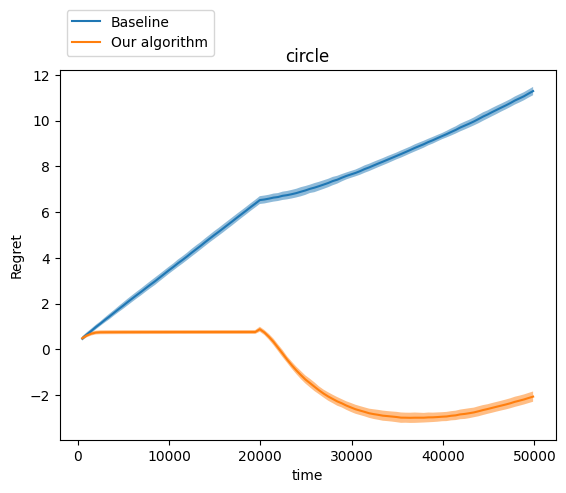

square 30044


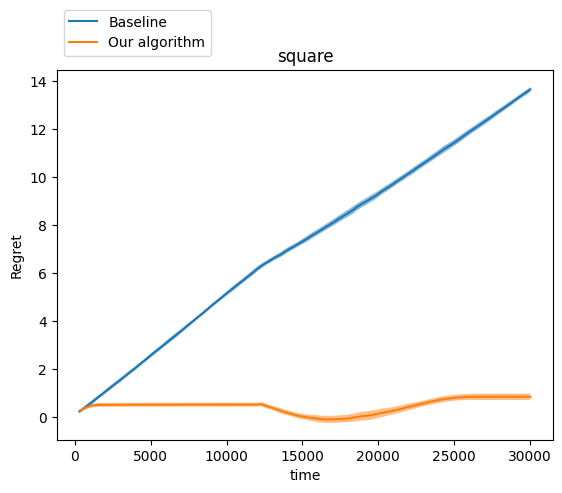

triangle 20099


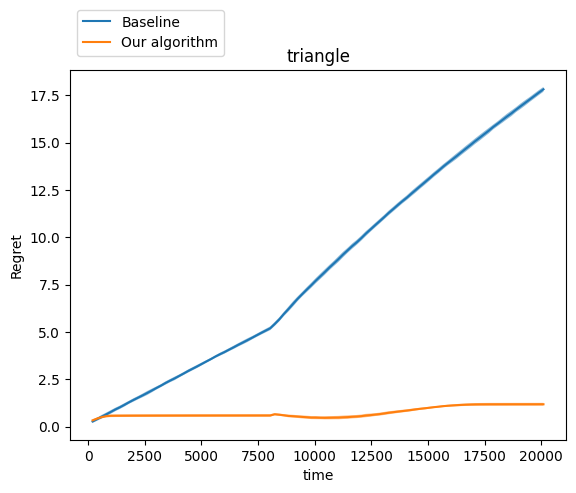

green 59985


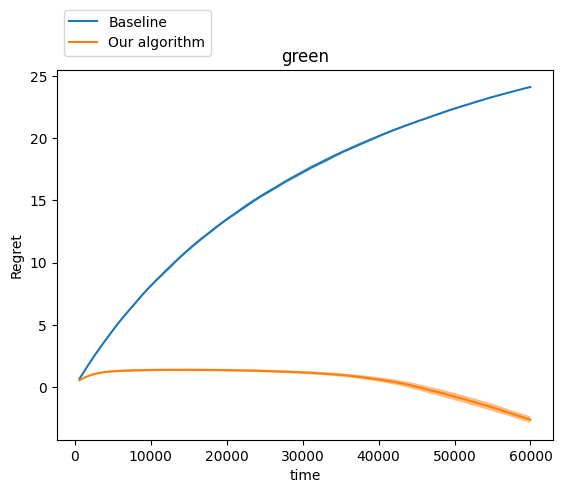

red 40015


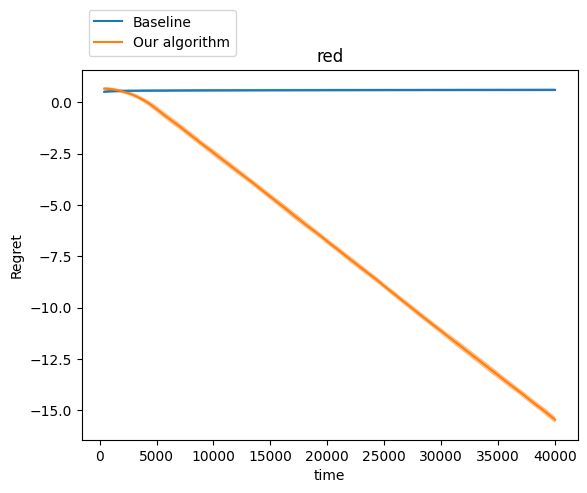

always_on 100000


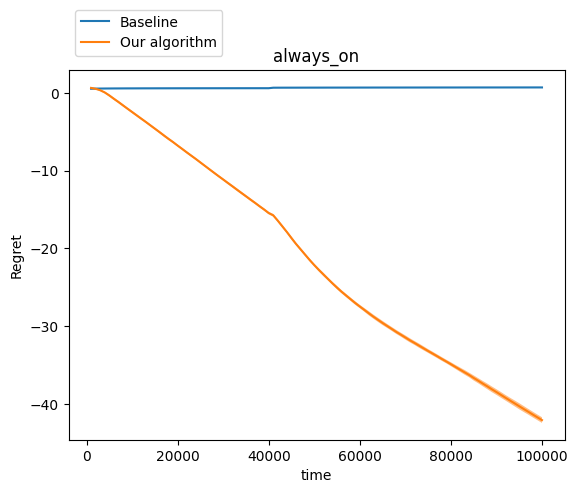

circle 49857


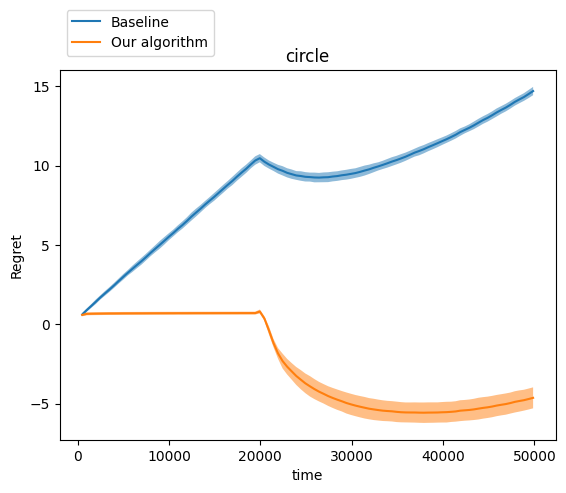

square 30044


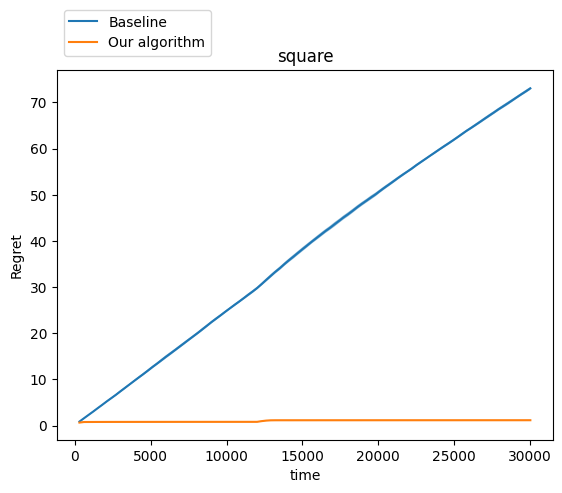

triangle 20099


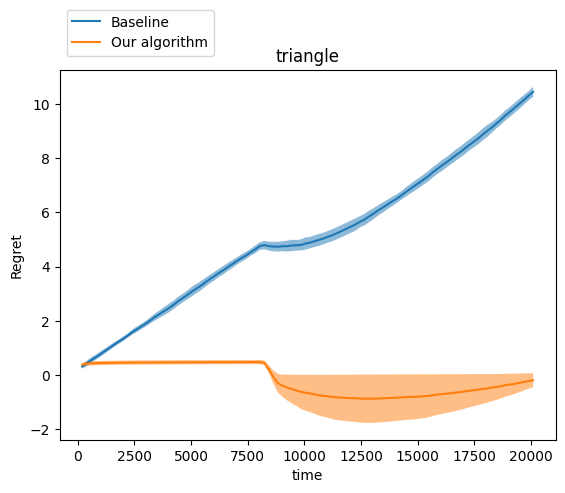

green 59985


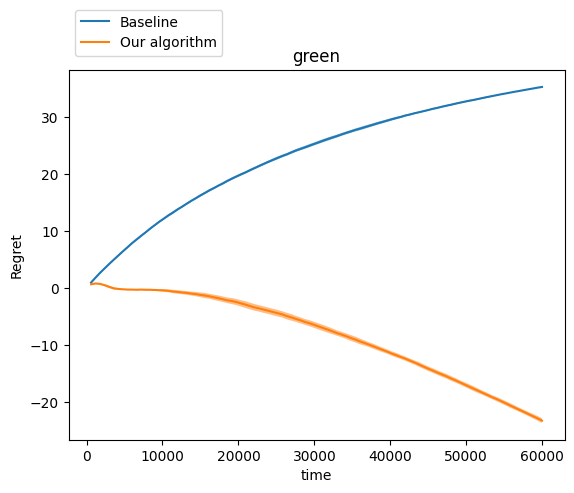

red 40015


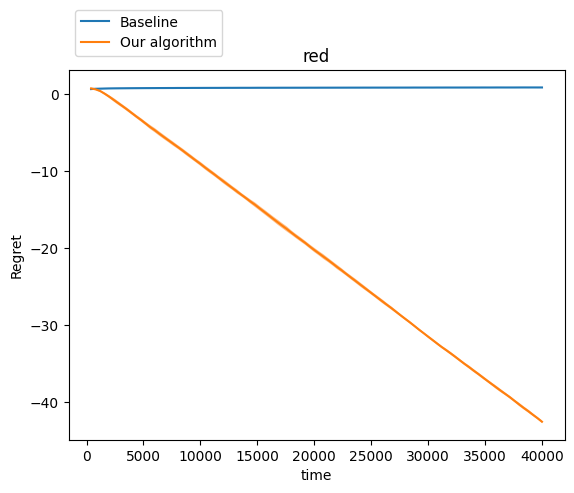

always_on 100000


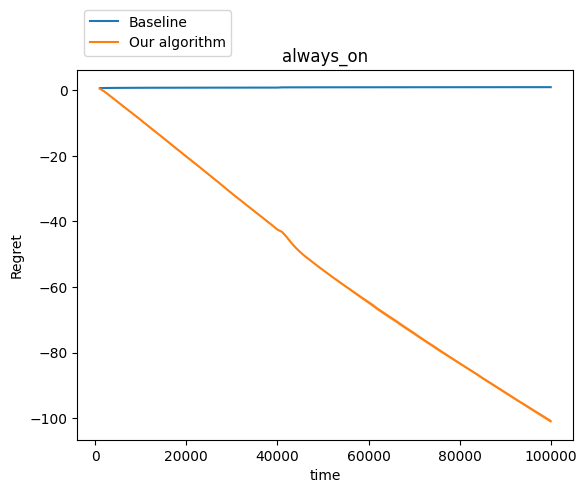

circle 49857


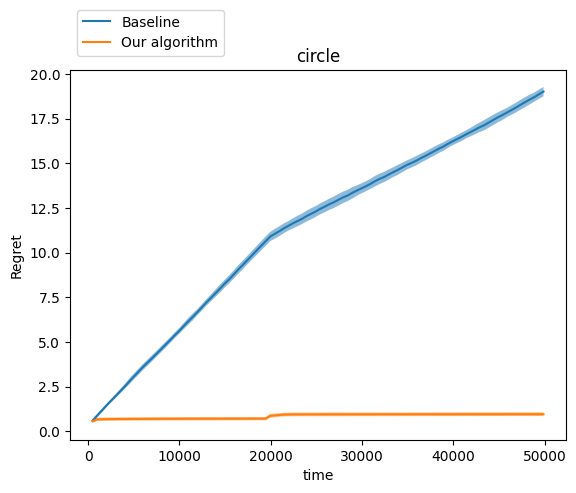

square 30044


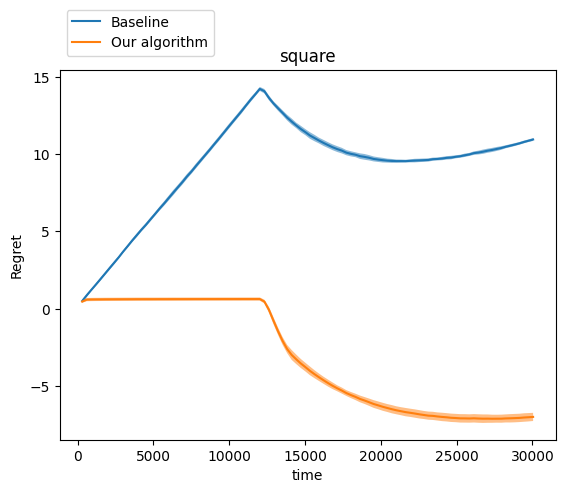

triangle 20099


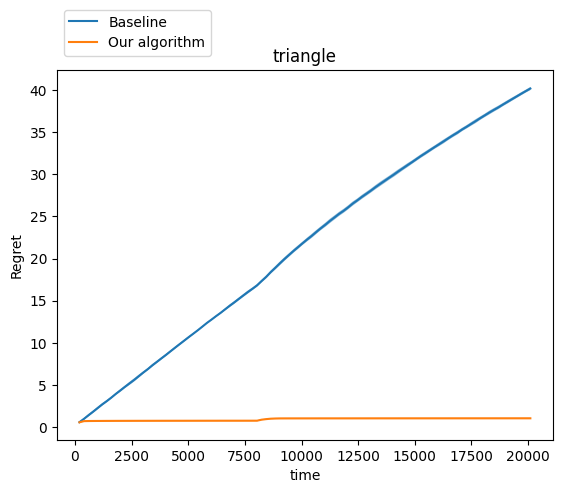

green 59985


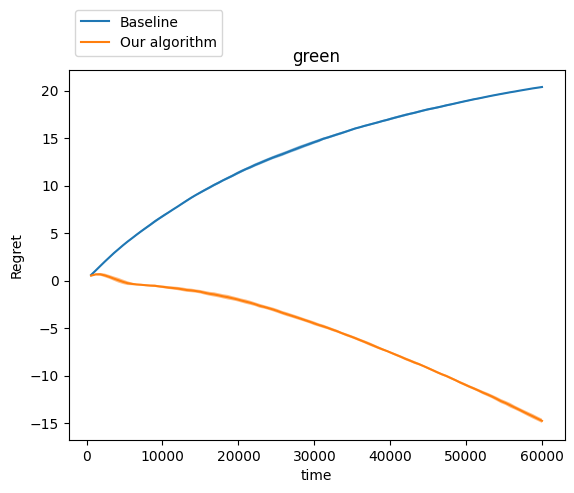

red 40015


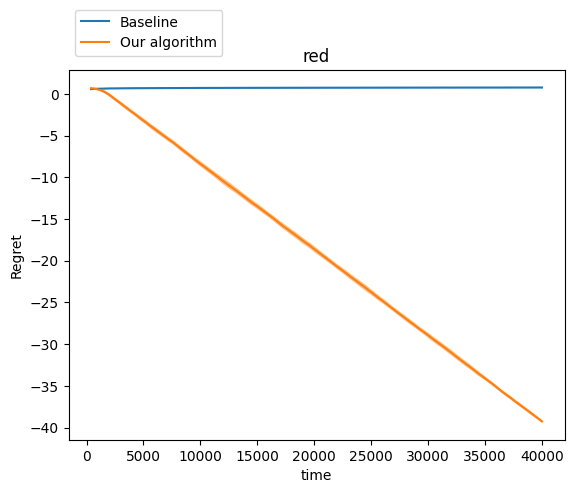

always_on 100000


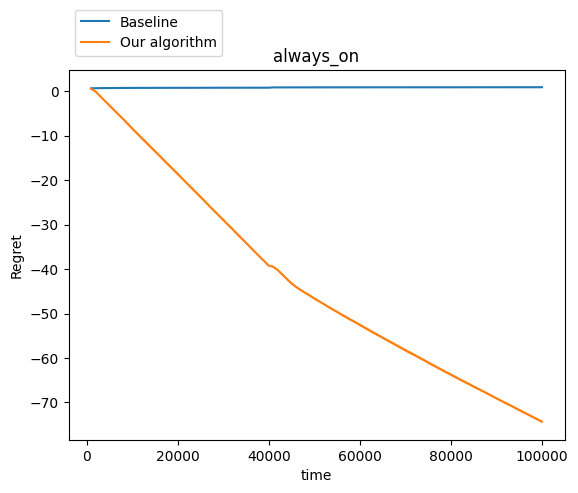

circle 49857


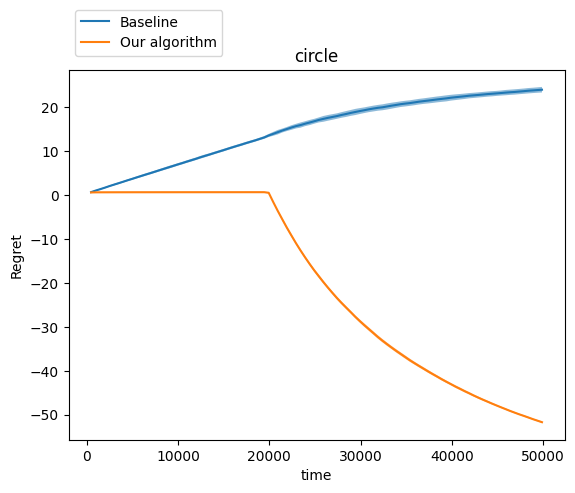

square 30044


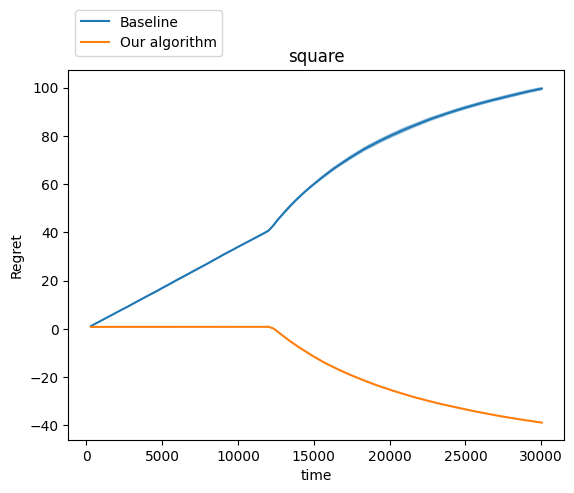

triangle 20099


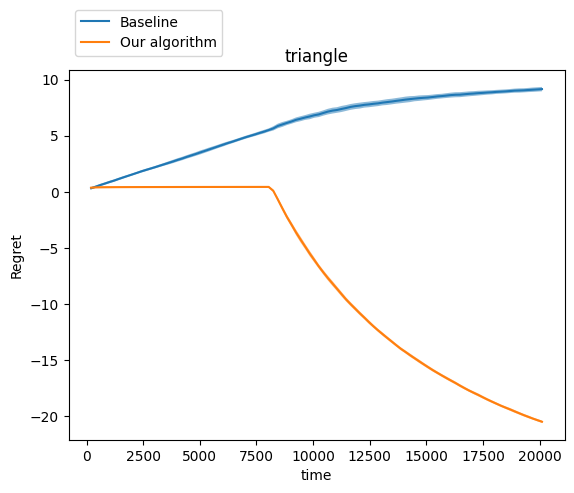

green 59985


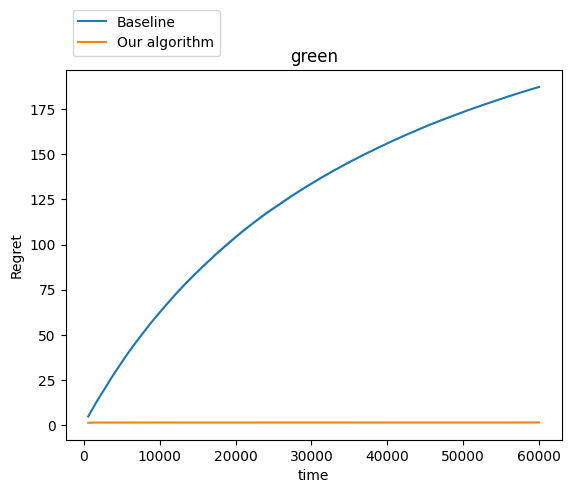

red 40015


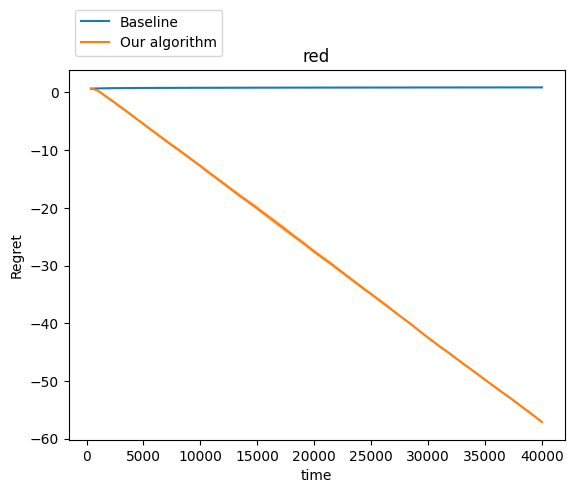

always_on 100000


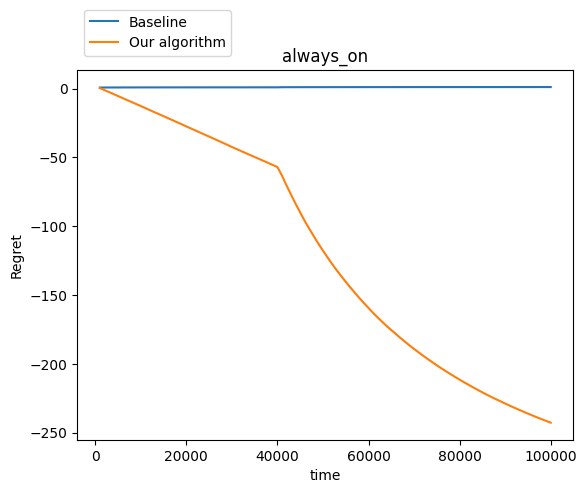

In [29]:
from bilevel.Groupwise_seedruns import plot_regret_curve_with_std
# ds_ymean = load_ob('syn_ymean_seeds.pickle')
plot_regret_curve_with_std(ds_ymean, 'synth_ymean_asc')

# ds_ymin = load_ob('syn_ymin_seeds.pickle')
plot_regret_curve_with_std(ds_ymin, 'synth_ymin_asc')

# ds_ymax = load_ob('syn_ymax_seeds.pickle')
plot_regret_curve_with_std(ds_ymax, 'synth_ymax_asc')


# ds_ydperm = load_ob('syn_ydperm_seeds.pickle')
plot_regret_curve_with_std(ds_ydperm, 'synth_ydperm_asc')

In [29]:
recs = []
for gnum, gname in enumerate(ds_ymean.group_names):
    print(gname, ds_ymean.group_sizes[gnum])
    recs.append([gname,ds_ymean.regret_Base_groupwise_array[gnum].mean(axis=0)[-1], ds_ymean.regret_Anh_groupwise_array[gnum].mean(axis=0)[-1]])

circle 49857
square 30044
triangle 20099
green 59985
red 40015
always_on 100000


In [30]:
recs

[['circle', 15.251997110388576, 0.7259449314606489],
 ['square', 15.434646792583441, 0.6325698318397185],
 ['triangle', 12.129030335953217, 0.7589509662176225],
 ['green', 10.017408486535388, -14.132259299839756],
 ['red', 14.751903858956979, -1.796636864075213],
 ['always_on', 0.7638470011019237, -39.93436150830535]]

In [31]:
pd.DataFrame(recs, columns = ['group', 'base', 'Anh'])

,group,base,Anh
0,circle,15.251997,0.725945
1,square,15.434647,0.632570
2,triangle,12.129030,0.758951
3,green,10.017408,-14.132259
4,red,14.751904,-1.796637
5,always_on,0.763847,-39.934362


In [32]:
from bilevel.Groupwise_seedruns import get_end_regret_gw_df
get_end_regret_gw_df(ds_ymean)

,group_name,mean_regend_Base,std_regend_Base,mean_regend_Anh,std_regend_Anh
0,circle,15.251997,0.217232,0.725945,0.089117
1,square,15.434647,0.130383,0.632570,0.057960
2,triangle,12.129030,0.104111,0.758951,0.040418
3,green,10.017408,0.150368,-14.132259,0.192891
4,red,14.751904,0.155782,-1.796637,0.166137
5,always_on,0.763847,0.058121,-39.934362,0.099225
